In [74]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Exercise 1
# part a

\begin{align}
    D_{[4,0]}^2  u(x_i)&=
    c_{-4} u(x_i-4h) + 
    c_{-3} u(x_i-3h) + 
    c_{-2} u(x_i-2h) +
    c_{-1} u(x_i-h) + 
    c_{0} u(x_i)
\end{align}

In [75]:
# Define the variables
c0, c1, c2, c3, c4, h = sp.symbols('c0 c1 c2 c3 c4 h')

# Define the system of equations
eq1 = sp.Eq(c0 + c1 +      c2 +      c3 +      c4, 0)
eq2 = sp.Eq(     c1 + 2*   c2 + 3*   c3 + 4*   c4, 0)
eq3 = sp.Eq(     c1 + 2**2*c2 + 3**2*c3 + 4**2*c4, 2/sp.Pow(h, 2))
eq4 = sp.Eq(     c1 + 2**3*c2 + 3**3*c3 + 4**3*c4, 0)
eq5 = sp.Eq(     c1 + 2**4*c2 + 3**4*c3 + 4**4*c4, 0)

# Solve the system
print('solution is')
solution = sp.solve((eq1, eq2, eq3, eq4, eq5), (c0, c1, c2, c3, c4))
print(solution)

solution is
{c0: 35/(12*h**2), c1: -26/(3*h**2), c2: 19/(2*h**2), c3: -14/(3*h**2), c4: 11/(12*h**2)}


## part b

\begin{align}
    D_{[2,2]}^2  u(x_i)&= 
    a_{2} u(x_i-2h) +
    a_{1} u(x_i-h) + 
    c_{0} u(x_i) +
    c_{1} u(x_i+h) + 
    c_{2} u(x_i+2h)
\end{align}

In [76]:
# Define the variables
a2, a1, c0, c1, c2, h = sp.symbols('a2 a1 c0 c1 c2 h')

# Define the system of equations
eq1 = sp.Eq(      a2 + a1 + c0 + c1 +      c2, 0)
eq2 = sp.Eq(   -2*a2 - a1 +      c1 +    2*c2, 0)
eq3 = sp.Eq( 2**2*a2 + a1 +      c1 + 2**2*c2, 2/sp.Pow(h, 2))
eq4 = sp.Eq(-2**3*a2 - a1 +      c1 + 2**3*c2, 0)
eq5 = sp.Eq( 2**4*a2 + a1 +      c1 + 2**4*c2, 0)

# Solve the system
print('solution is')
solution = sp.solve((eq1, eq2, eq3, eq4, eq5), (a2, a1, c0, c1, c2))
print(solution)

solution is
{a1: 4/(3*h**2), a2: -1/(12*h**2), c0: -5/(2*h**2), c1: 4/(3*h**2), c2: -1/(12*h**2)}


## part c

In [77]:
def D_2(left, right, h, eval_point=0, 
        u=lambda x: np.exp(np.cos(x)), 
        u_xx=lambda x: (np.sin(x)**2 - np.cos(x)) * np.exp(np.cos(x))):
    """
    Approximates the second derivative of a function u(x) at a given point 
    using a finite difference stencil.

    The function constructs a system of equations to determine the finite 
    difference coefficients for the second derivative and then applies 
    these coefficients to approximate u''(x).

    Parameters:
    -----------
    left : int
        Number of stencil points to the left of the evaluation point.
    right : int
        Number of stencil points to the right of the evaluation point.
    h : float
        Step size for the finite difference approximation.
    eval_point : float, optional
        The x-coordinate for approximated second derivative
        Default: 0.
    u : function, optional
        The function u(x) whose second derivative is approximated. 
        Default: u(x) = exp(cos(x)).
    u_xx : function, optional
        The exact second derivative u''(x) for error computation.
        Default: u(x) = exp(cos(x)).

    Returns:
    --------
    u_xx_hat : float
        Approximation of u''(x) at eval_point.
    error : float
        Absolute error for the approximation.
    """

    if left + right < 2:
        raise ValueError('left + right should be at least 2')
    
    N = left + right + 1  # Number of stencil points
    stencils = np.arange(-left, right + 1)  # Stencil range

    # ____ Construct the system matrix A ____
    A = np.zeros([N, N])  # initialize matrix
    for i in range(N):
        for j, m in enumerate(stencils):
            A[i, j] = m ** i # set values

    # ____ Construct right-hand side b ____
    b = np.zeros(N) # initial ize with zeros
    b[2] = 2 / h**2  # setting the non-zero element

    # Solve for finite difference coefficients
    c = np.linalg.solve(A, b)

    # ___ Evaluate function at stencil points ____
    x_vals = np.array([eval_point + m * h for m in stencils])
    u_vals = np.array([u(xi) for xi in x_vals])  # Apply function correctly

    # Compute the finite difference approximation of the second derivative
    u_xx_hat = np.dot(c, u_vals)

    # Compute absolute error
    error = abs(u_xx(eval_point) - u_xx_hat)
    return u_xx_hat, error


## part d

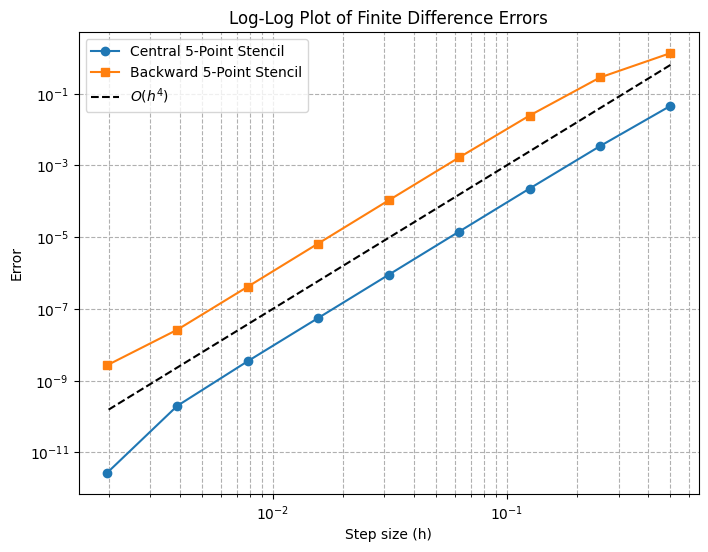

In [78]:
# Define step sizes
hs = [(1/2)**s for s in range(1, 10)]  # Different step sizes

# Store errors for different stencil sizes
errors = np.zeros([2, len(hs)])

for idx, h in enumerate(hs):
    temp, errors[0, idx] = D_2(2, 2, h)  # Central 5-point stencil (2 left, 2 right)
    temp ,errors[1, idx] = D_2(4, 0, h)  # Backward 5-point stencil (4 left, 0 right)

# Plot the results in a log-log plot

plt.figure(figsize=(8, 6))
plt.loglog(hs, errors[0], 'o-', label='Central 5-Point Stencil')
plt.loglog(hs, errors[1], 's-', label='Backward 5-Point Stencil')

# Add an O(h^4) reference line for comparison
ref_slope = [10 * h**4 for h in hs]  # Scaled for visibility
plt.loglog(hs, ref_slope, 'k--', label=r'$O(h^4)$')

# Formatting
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Log-Log Plot of Finite Difference Errors')
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Show plot
plt.show()


# EXERCISE 2 a
## part b

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
alpha = -1
beta = 1.5
epsilon = 0.1
x_0 = 0
x_N = 1
N = 1000+1
x = np.linspace(x_0, x_N, N)
h = x[1] - x[0]
u = np.linspace(alpha, beta, N)

# Function to compute the residual F(u)
def F(u):
    F = np.zeros(N-2)
    for i in range(1, N-1):
        u_prime = (u[i+1] - u[i-1]) / (2*h)  # First derivative
        u_double_prime = (u[i+1] - 2*u[i] + u[i-1]) / (h**2)  # Second derivative
        F[i-1] = epsilon * u_double_prime + u[i] * (u_prime - 1)
    return F

# Function to compute the Jacobian J(u)
def J(u):
    jacobian = np.zeros((N-2, N-2))
    
    for i in range(1, N-1):
        # Main diagonal
        jacobian[i-1, i-1] = -(2*epsilon)/h**2 + (u[i+1] - u[i-1]) / (2*h) - 1
        # Upper diagonal (i -> i+1)
        if i < N-2:
            jacobian[i-1, i] = epsilon/h**2 + u[i] / (2*h)
        # Lower diagonal (i -> i-1)
        if i > 1:
            jacobian[i-1, i-2] = epsilon/h**2 - u[i] / (2*h)
    
    return jacobian

# Newton's method to iteratively update u
def newton_method(u, tol=1e-6, max_iter=100):
    iter_count = 0
    while iter_count < max_iter:
        # Compute the residual and Jacobian
        F_u = F(u)
        J_u = J(u)
        
        # Check for convergence (if F(u) is small enough)
        if np.max(np.abs(F_u)) < tol:
            print(f"Converged after {iter_count} iterations")
            break
        
        # Update the solution using Newton's method
        delta_u = np.linalg.solve(J_u, -F_u)  # Solve J(u) * delta_u = -F(u)
        u[1:-1] = u[1:-1] + delta_u  # Update u (excluding the boundary points)

        iter_count += 1
    
    return u


Converged after 4 iterations


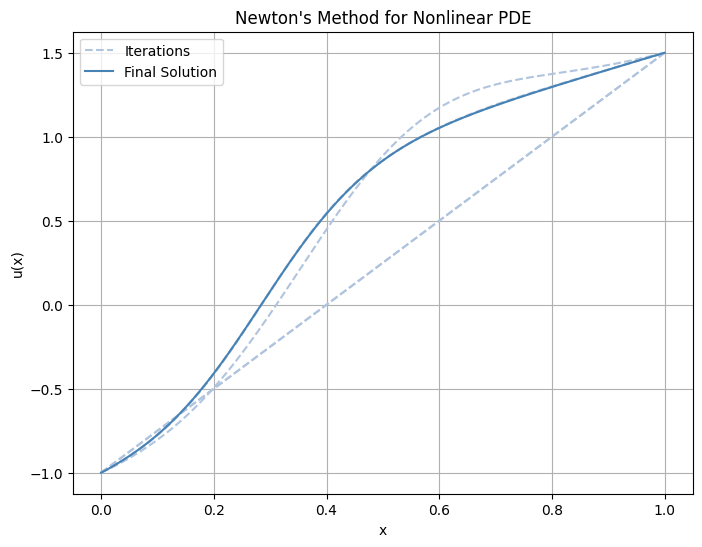

In [80]:
# Newton's method to iteratively update u
def newton_method_plot(u, x, tol=1e-6, max_iter=100):
    plt.figure(figsize=(8, 6))
    plt.plot(x, u, linestyle='--', color='lightsteelblue', label='Iterations')

    iter_count = 0
    while iter_count < max_iter:
        # Compute the residual and Jacobian
        F_u = F(u)
        J_u = J(u)
        
        # Check for convergence
        if np.max(np.abs(F_u)) < tol:
            print(f"Converged after {iter_count} iterations")
            plt.plot(x, u, linestyle='-', color='steelblue', label='Final Solution')
            break
        else:
            plt.plot(x, u, linestyle='--', color='lightsteelblue')
        
        # Update the solution using Newton's method
        delta_u = np.linalg.solve(J_u, -F_u)  # Solve J(u) * delta_u = -F(u)
        u[1:-1] += delta_u  # Update u (excluding the boundary points)

        iter_count += 1
    
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title("Newton's Method for Nonlinear PDE")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return u

u = np.linspace(alpha, beta, N)
# Run Newton's method and plot the results
u_final = newton_method_plot(u, x)


# EXERCISE 2 b

Time for sparse solver: 0.6317 seconds


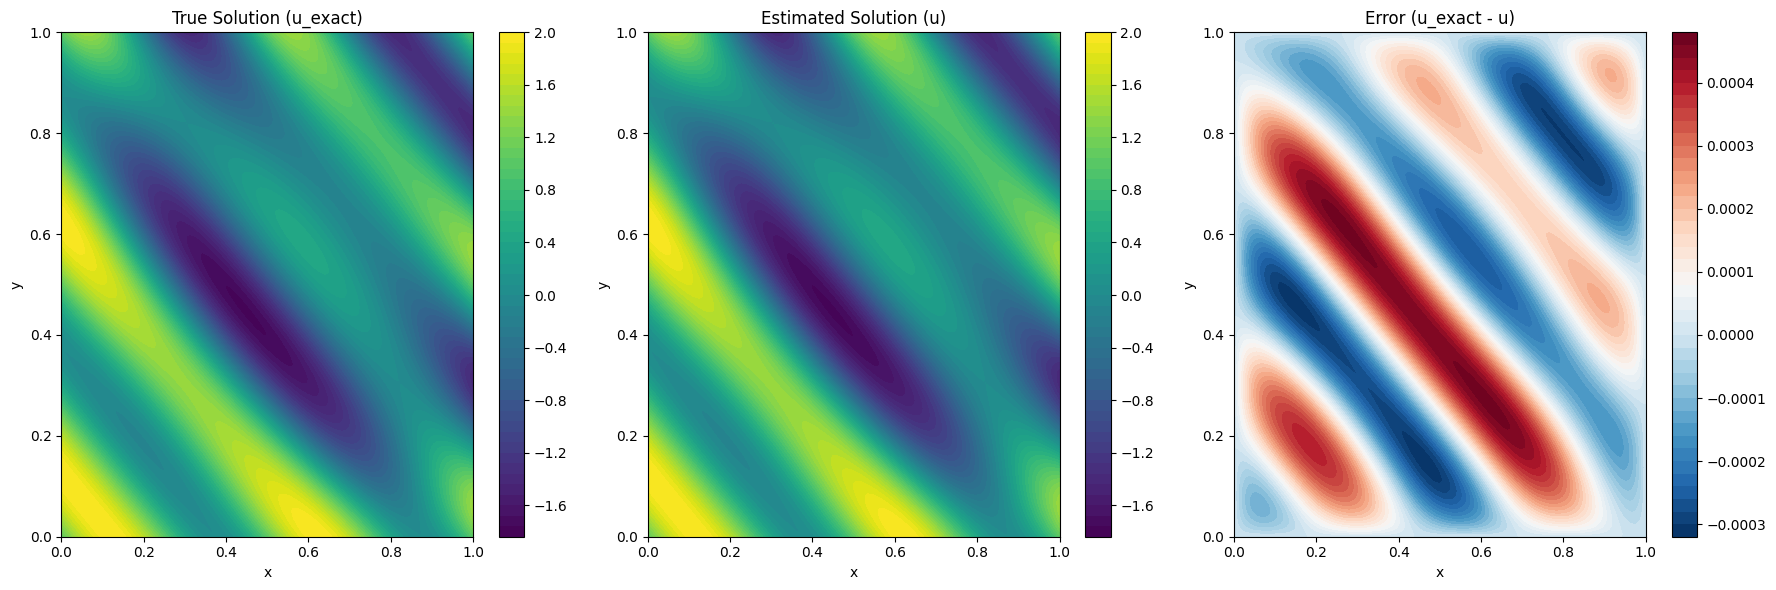

In [81]:
import numpy as np
import scipy.sparse as sp
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import time  # Import time module to measure execution time

# Solution function u(x,y)
def u_exact(x, y):
    return np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y)

# Right-hand side function f(x,y)
def f_rhs(x, y):
    return -16 * np.pi**2 * (2 * np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y) * (x**2 + y**2))

# Parameters
N = 200  # number of grid points in each direction
h = 1.0 / N  # grid spacing

# Create the grid
x_vals = np.linspace(0, 1, N+1)
y_vals = np.linspace(0, 1, N+1)

# Create 2D grid
X, Y = np.meshgrid(x_vals, y_vals, indexing="ij")

# Initialize the solution grid with boundary conditions set to the true solution
u = np.zeros((N+1, N+1))  # solution grid
u[:, 0] = u_exact(x_vals, 0)  # Left boundary
u[:, -1] = u_exact(x_vals, 1)  # Right boundary
u[0, :] = u_exact(0, y_vals)  # Bottom boundary
u[-1, :] = u_exact(1, y_vals)  # Top boundary

# Right-hand side function for interior points
f = f_rhs(X, Y)

# Poisson 5-point stencil matrix
def poisson5(m, h):
    e = np.ones(m) / h**2  # Scaling by 1/h^2 for correct discretization
    S = sp.diags([e, -2*e, e], [-1, 0, 1], shape=(m, m))
    I = sp.eye(m)
    A = sp.kron(I, S) + sp.kron(S, I)
    return A

# Laplacian kernel for convolution
L = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / h**2
# right-hand side computation (convolution)
rhs = f[1:-1, 1:-1] - convolve2d(u, L, mode='valid')

# Flatten the right-hand side to a vector for the sparse solver
f_vec = rhs.flatten()

# Timing the Poisson matrix assembly
A = poisson5(N-1, h)

# Timing the sparse solver
start_time = time.time()  # Start the timer
u_inner = sp.linalg.spsolve(A, f_vec)
solver_time = time.time() - start_time  # End the timer and record the time
print(f"Time for sparse solver: {solver_time:.4f} seconds")

# Reshape the solution back into the grid (excluding boundaries)
u[1:-1, 1:-1] = u_inner.reshape((N-1, N-1))

# Now `u` contains the solution, including the boundary conditions

# Calculate the error between the exact and estimated solutions
error = u_exact(X, Y) - u

# Plotting the results: True Solution, Estimated Solution, and Error
plt.figure(figsize=(18, 6))

# Plot the true solution (u_exact)
plt.subplot(1, 3, 1)
plt.title("True Solution (u_exact)")
cp1 = plt.contourf(X, Y, u_exact(X, Y), levels=50, cmap='viridis')
plt.colorbar(cp1)
plt.xlabel('x')
plt.ylabel('y')

# Plot the estimated solution (u)
plt.subplot(1, 3, 2)
plt.title("Estimated Solution (u)")
cp2 = plt.contourf(X, Y, u, levels=50, cmap='viridis')
plt.colorbar(cp2)
plt.xlabel('x')
plt.ylabel('y')

# Plot the error
plt.subplot(1, 3, 3)
plt.title("Error (u_exact - u)")
cp3 = plt.contourf(X, Y, error, levels=50, cmap='RdBu_r')
plt.colorbar(cp3)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()



Time for sparse solver: 1.2292 seconds


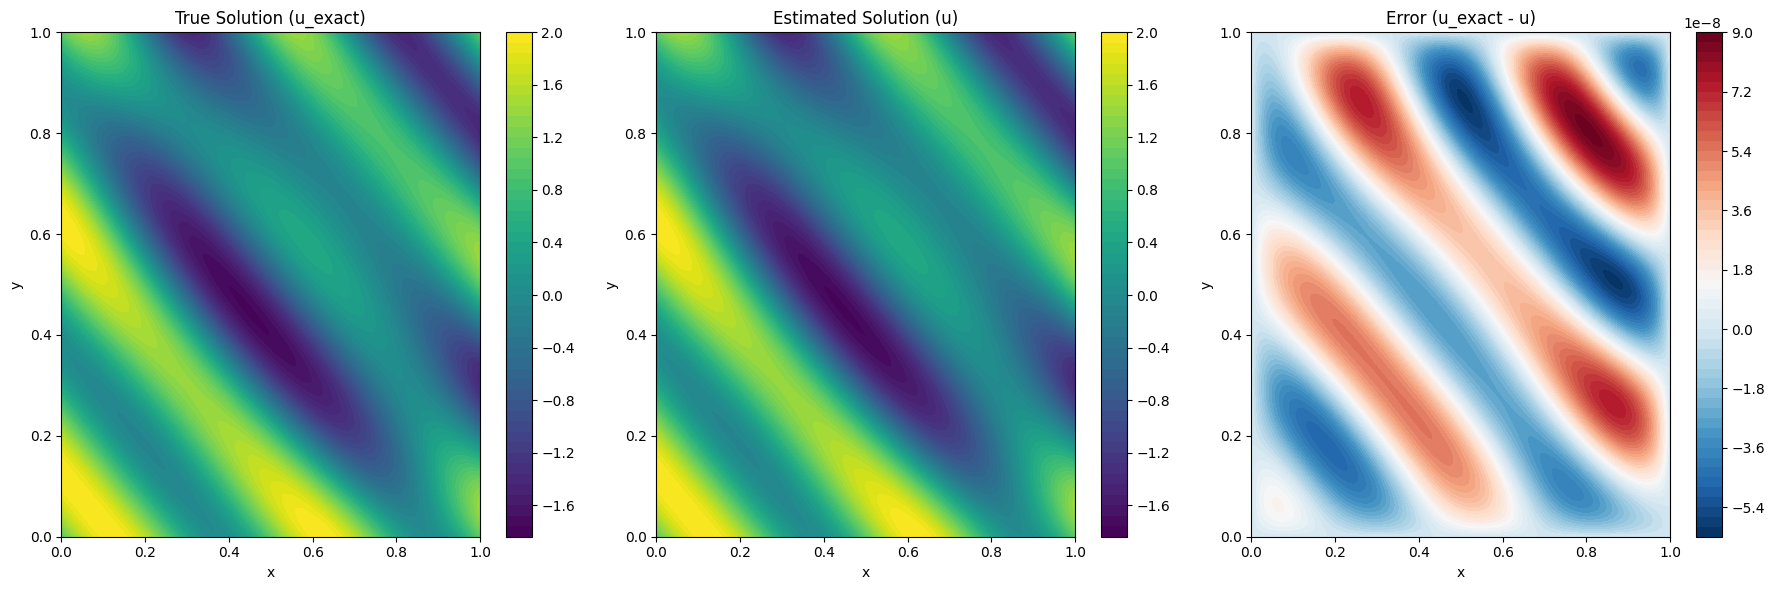

In [82]:
import numpy as np
import numpy as np
import scipy.sparse as sp
from scipy.signal import convolve2d
from scipy.sparse.linalg import cg
import matplotlib.pyplot as plt
import time  # Import time module to measure execution time

# Solution function u(x,y)
def u_exact(x, y):
    return np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y)

# Right-hand side function f(x,y)
def f_rhs(x, y):
    return -16 * np.pi**2 * (2 * np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y) * (x**2 + y**2))

def poisson9(m, h):
    """
    Constructs the sparse matrix A for the 9-point stencil discretization 
    using Kronecker products, equivalent to the MATLAB version.

    Parameters:
    m : int  - Number of interior grid points in one dimension

    Returns:
    A : scipy.sparse matrix (size m^2 x m^2)
    """
    e = np.ones(m)
    # Define the S matrix (tridiagonal with [-1, -10, -1])
    S = sp.diags([-e, -10*e, -e], [-1, 0, 1], shape=(m, m))
    # Define the I matrix (tridiagonal with [-1/2, 1, -1/2])
    I = sp.diags([-0.5*e, e, -0.5*e], [-1, 0, 1], shape=(m, m))
    # Compute the Kronecker sum
    A = (sp.kron(I, S) + sp.kron(S, I)) / (6 * h**2) 

    return A.tocsr()  # Convert to CSR format for efficiency

N = 200

# Initialize the solution grid with boundary conditions set to the true solution
u = np.zeros((N+1, N+1))  # solution grid
u[:, 0] = u_exact(x_vals, 0)  # Left boundary
u[:, -1] = u_exact(x_vals, 1)  # Right boundary
u[0, :] = u_exact(0, y_vals)  # Bottom boundary
u[-1, :] = u_exact(1, y_vals)  # Top boundary

# Right-hand side function for interior points
f = f_rhs(X, Y)

# Laplacian kernel for convolution
L_5 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / h**2
L_9 = np.array([[1, 4, 1], [4, -20, 4], [1, 4, 1]])/ (6 * h**2)
# right-hand side computation (convolution)
rhs = f[1:-1, 1:-1] - convolve2d(u, L_9, mode='valid') + h**2/12 * convolve2d(f, L_5, mode='valid')

# Flatten the right-hand side to a vector for the sparse solver
f_vec = rhs.flatten()

# Timing the Poisson matrix assembly
A = poisson9(N-1, h)

# Timing the sparse solver
start_time = time.time()  # Start the timer
u_inner = sp.linalg.spsolve(A, f_vec)
solver_time = time.time() - start_time  # End the timer and record the time
print(f"Time for sparse solver: {solver_time:.4f} seconds")

# Reshape the solution back into the grid (excluding boundaries)
u[1:-1, 1:-1] = u_inner.reshape((N-1, N-1))

# Now `u` contains the solution, including the boundary conditions

# Calculate the error between the exact and estimated solutions
error = u_exact(X, Y) - u

# Plotting the results: True Solution, Estimated Solution, and Error
plt.figure(figsize=(18, 6))

# Plot the true solution (u_exact)
plt.subplot(1, 3, 1)
plt.title("True Solution (u_exact)")
cp1 = plt.contourf(X, Y, u_exact(X, Y), levels=50, cmap='viridis')
plt.colorbar(cp1)
plt.xlabel('x')
plt.ylabel('y')

# Plot the estimated solution (u)
plt.subplot(1, 3, 2)
plt.title("Estimated Solution (u)")
cp2 = plt.contourf(X, Y, u, levels=50, cmap='viridis')
plt.colorbar(cp2)
plt.xlabel('x')
plt.ylabel('y')

# Plot the error
plt.subplot(1, 3, 3)
plt.title("Error (u_exact - u)")
cp3 = plt.contourf(X, Y, error, levels=50, cmap='RdBu_r')
plt.colorbar(cp3)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()



 _____ N = 100 _____ 
Time for 5-point Laplacian sparse solver: 0.0671 seconds
Time for 9-point Laplacian sparse solver: 0.1032 seconds
 _____ N = 200 _____ 
Time for 5-point Laplacian sparse solver: 0.4717 seconds
Time for 9-point Laplacian sparse solver: 1.0865 seconds
 _____ N = 300 _____ 
Time for 5-point Laplacian sparse solver: 2.0904 seconds
Time for 9-point Laplacian sparse solver: 3.7737 seconds
 _____ N = 400 _____ 
Time for 5-point Laplacian sparse solver: 5.0040 seconds
Time for 9-point Laplacian sparse solver: 7.9068 seconds
 _____ N = 500 _____ 
Time for 5-point Laplacian sparse solver: 8.7406 seconds
Time for 9-point Laplacian sparse solver: 14.3839 seconds


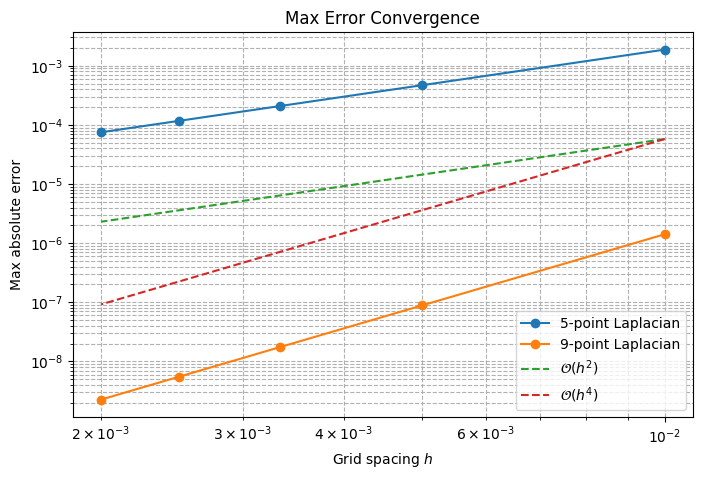

In [83]:
import numpy as np
import scipy.sparse as sp
from scipy.signal import convolve2d
from scipy.sparse.linalg import cg
import matplotlib.pyplot as plt
import time  # Import time module to measure execution time

# Solution function u(x,y)
def u_exact(x, y):
    return np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y)

# Right-hand side function f(x,y)
def f_rhs(x, y):
    return -16 * np.pi**2 * (2 * np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y) * (x**2 + y**2))

# Poisson 5-point stencil matrix
def poisson5(m, h):
    e = np.ones(m) / h**2  
    S = sp.diags([e, -2*e, e], [-1, 0, 1], shape=(m, m))
    I = sp.eye(m)
    A = sp.kron(I, S) + sp.kron(S, I)
    return A # Convert to CSR format for efficiency

def poisson9(m, h):
    e = np.ones(m)
    S = sp.diags([-e, -10*e, -e], [-1, 0, 1], shape=(m, m))
    I = sp.diags([-0.5*e, e, -0.5*e], [-1, 0, 1], shape=(m, m))
    A = (sp.kron(I, S) + sp.kron(S, I)) / (6 * h**2) 

    return A.tocsr()  # Convert to CSR format for efficiency

def solve_possion_5(N):

    h = 1.0 / N  # grid spacing
    
    # Create the grid
    x_vals = np.linspace(0, 1, N+1)
    y_vals = np.linspace(0, 1, N+1)

    # Create 2D grid
    X, Y = np.meshgrid(x_vals, y_vals, indexing="ij")

    # Initialize the solution grid with boundary conditions set to the true solution
    u = np.zeros((N+1, N+1))  # solution grid
    u[:, 0] = u_exact(x_vals, 0)  # Left boundary
    u[:, -1] = u_exact(x_vals, 1)  # Right boundary
    u[0, :] = u_exact(0, y_vals)  # Bottom boundary
    u[-1, :] = u_exact(1, y_vals)  # Top boundary

    # Right-hand side function for interior points
    f = f_rhs(X, Y)

    # Laplacian kernel for convolution
    L = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / h**2
    # right-hand side computation (convolution)
    rhs = f[1:-1, 1:-1] - convolve2d(u, L, mode='valid')

    # Flatten the right-hand side to a vector for the sparse solver
    f_vec = rhs.flatten()

    # Timing the Poisson matrix assembly
    A = poisson5(N-1, h)

    # Timing the sparse solver
    start_time = time.time()  # Start the timer
    u_inner = sp.linalg.spsolve(A, f_vec)
    solver_time = time.time() - start_time  # End the timer and record the time
    print(f"Time for 5-point Laplacian sparse solver: {solver_time:.4f} seconds")

    # Reshape the solution back into the grid (excluding boundaries)
    u[1:-1, 1:-1] = u_inner.reshape((N-1, N-1))

    # Now `u` contains the solution, including the boundary conditions

    # Calculate the error between the exact and estimated solutions
    error = u_exact(X, Y) - u

    return np.max(np.abs(error))


def solve_possion_9(N):
    h = 1.0 / N  # grid spacing

    # Create the grid
    x_vals = np.linspace(0, 1, N+1)
    y_vals = np.linspace(0, 1, N+1)

    # Create 2D grid
    X, Y = np.meshgrid(x_vals, y_vals, indexing="ij")

    # Initialize the solution grid with boundary conditions set to the true solution
    u = np.zeros((N+1, N+1))  # solution grid
    u[:, 0] = u_exact(x_vals, 0)  # Left boundary
    u[:, -1] = u_exact(x_vals, 1)  # Right boundary
    u[0, :] = u_exact(0, y_vals)  # Bottom boundary
    u[-1, :] = u_exact(1, y_vals)  # Top boundary

    # Right-hand side function for interior points
    f = f_rhs(X, Y)

    # Laplacian kernel for convolution
    L_5 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / h**2
    L_9 = np.array([[1, 4, 1], [4, -20, 4], [1, 4, 1]])/ (6 * h**2)
    # right-hand side computation (convolution)
    rhs = f[1:-1, 1:-1] - convolve2d(u, L_9, mode='valid') + h**2/12 * convolve2d(f, L_5, mode='valid')

    # Flatten the right-hand side to a vector for the sparse solver
    f_vec = rhs.flatten()

    # Timing the Poisson matrix assembly
    A = poisson9(N-1, h)

    # Timing the sparse solver
    start_time = time.time()  # Start the timer
    u_inner = sp.linalg.spsolve(A, f_vec)
    solver_time = time.time() - start_time  # End the timer and record the time
    print(f"Time for 9-point Laplacian sparse solver: {solver_time:.4f} seconds")

    # Reshape the solution back into the grid (excluding boundaries)
    u[1:-1, 1:-1] = u_inner.reshape((N-1, N-1))

    # Now `u` contains the solution, including the boundary conditions

    # Calculate the error between the exact and estimated solutions
    error = u_exact(X, Y) - u

    return np.max(np.abs(error))





Ns = [i * 100 for i in range(1,6)]
E_5 = []
E_9 = []
for N in Ns:
    print(f' _____ N = {N} _____ ')
    E_5.append(solve_possion_5(N))
    E_9.append(solve_possion_9(N))

# Plot convergence
plt.figure(figsize=(8, 5))

# Compute h values
h_vals = 1 / np.array(Ns)  # Since h = 1/N
# Plot error
plt.loglog(h_vals, E_5, 'o-', label="5-point Laplacian")
plt.loglog(h_vals, E_9, 'o-', label="9-point Laplacian")

h_squared = h_vals ** 2  # O(h^2) scaling
# Scale reference line to match the first error value
scale_factor = (3*E_5[0]/100 + 98*E_9[0]/100) / h_squared[0]
ref_line = scale_factor * h_squared  # Adjusted O(h^2) line
# Plot O(h^2) reference line
plt.loglog(h_vals, ref_line, '--', label=r'$\mathcal{O}(h^2)$')

h_4th = h_vals ** 4  # O(h^4) scaling
# Scale reference line to match the first error value
scale_factor = (3*E_5[0]/100 + 98*E_9[0]/100) / h_4th[0]
ref_line = scale_factor * h_4th  # Adjusted O(h^2) line
# Plot O(h^2) reference line
plt.loglog(h_vals, ref_line, '--', label=r'$\mathcal{O}(h^4)$')

# Labels and title
plt.xlabel("Grid spacing $h$")
plt.ylabel("Max absolute error")
plt.title("Max Error Convergence")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()


# Matrix Free CG

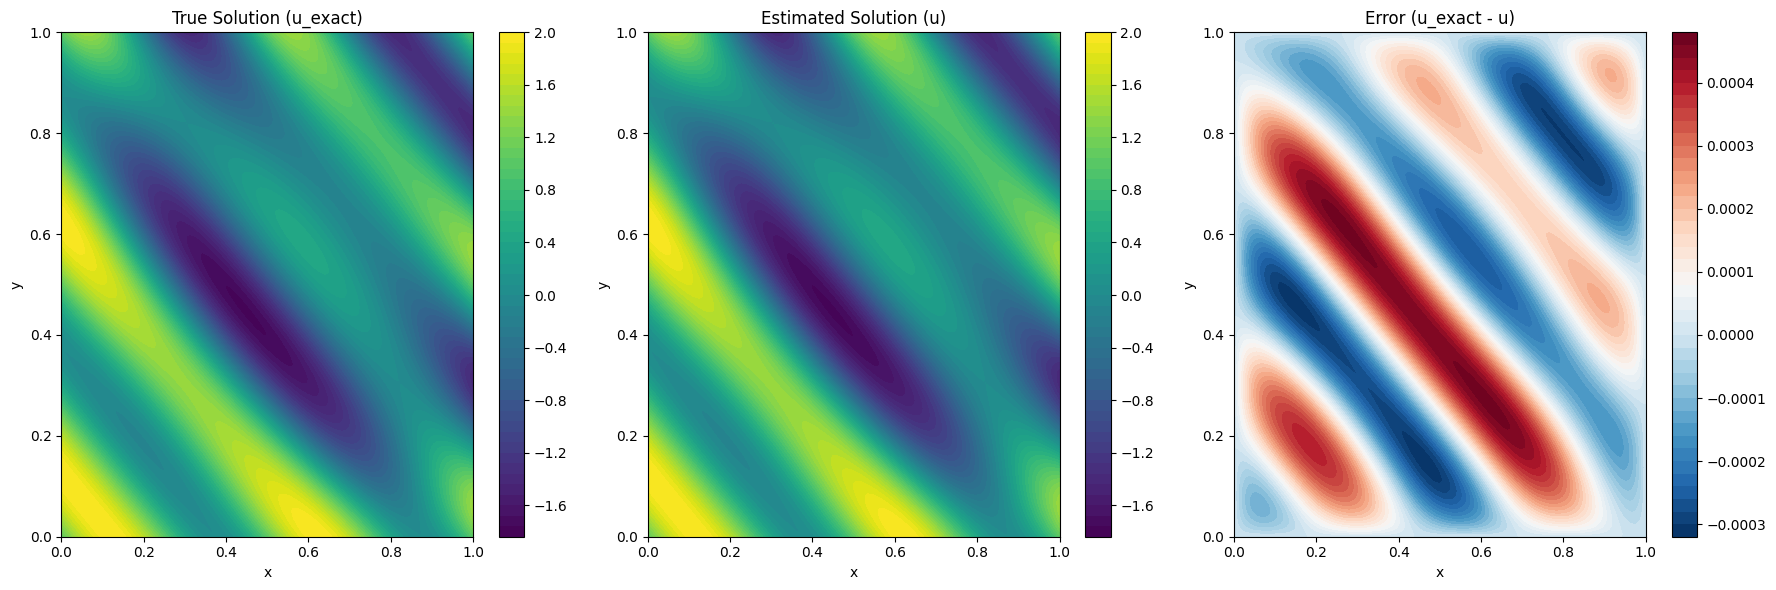

In [84]:
import numpy as np
from scipy.signal import convolve2d

def Amult(u, m):
    if len(u) != m**2:
        raise ValueError("Length of input u must be equal to m^2.")
    
    u = u.reshape(m, m)  # Reshape to 2D
    L_5 = np.array([[0, 1, 0],  
                    [1, -4, 1],
                    [0, 1, 0]]) * ((m+1)**2)  # Proper scaling of the Laplacian
    
    u = convolve2d(u, L_5, mode='same')  # Apply convolution
    return -u.reshape(m**2)  # Return as a flat vector

def cg(u_0, f, m, max_iter=10000, tol=1e-10):
    u = u_0.copy()  # Initialize solution
    r = -f - Amult(u, m)  # Initial residual
    p = r.copy()
    
    for i in range(max_iter):
        w = Amult(p, m)
        r_dot_r = np.dot(r, r)
        a = r_dot_r / np.dot(p, w)
        
        u += a * p  # Corrected update
        r -= a * w  # Update residual
        
        if np.max(np.abs(r)) < tol:
            break
        
        b = np.dot(r, r) / r_dot_r
        p = r + b * p
    
    return u

# Solution function u(x,y)
def u_exact(x, y):
    return np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y)

# Right-hand side function f(x,y)
def f_rhs(x, y):
    return -16 * np.pi**2 * (2 * np.sin(4 * np.pi * (x + y)) + np.cos(4 * np.pi * x * y) * (x**2 + y**2))

N = 200
h = 1.0 / N  # grid spacing
    
# Create the grid
x_vals = np.linspace(0, 1, N+1)
y_vals = np.linspace(0, 1, N+1)

# Create 2D grid
X, Y = np.meshgrid(x_vals, y_vals, indexing="ij")

# Initialize the solution grid with boundary conditions set to the true solution
u = np.zeros((N+1, N+1))  # solution grid
u[:, 0] = u_exact(x_vals, 0)  # Left boundary
u[:, -1] = u_exact(x_vals, 1)  # Right boundary
u[0, :] = u_exact(0, y_vals)  # Bottom boundary
u[-1, :] = u_exact(1, y_vals)  # Top boundary

# Right-hand side function for interior points
f = f_rhs(X, Y)

# Laplacian kernel for convolution
L = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) * N**2
# right-hand side computation (convolution)
f = f[1:-1, 1:-1] - convolve2d(u, L, mode='valid')

# Flatten the right-hand side to a vector for the sparse solver
f = f.flatten()
u0 = np.zeros_like(f)

u_inner = cg(u0, f, m = N-1)
u[1:-1, 1:-1] = u_inner.reshape((N-1, N-1))
# Calculate the error between the exact and estimated solutions
error = u_exact(X, Y) - u

# Plotting the results: True Solution, Estimated Solution, and Error
plt.figure(figsize=(18, 6))

# Plot the true solution (u_exact)
plt.subplot(1, 3, 1)
plt.title("True Solution (u_exact)")
cp1 = plt.contourf(X, Y, u_exact(X, Y), levels=50, cmap='viridis')
plt.colorbar(cp1)
plt.xlabel('x')
plt.ylabel('y')

# Plot the estimated solution (u)
plt.subplot(1, 3, 2)
plt.title("Estimated Solution (u)")
cp2 = plt.contourf(X, Y, u, levels=50, cmap='viridis')
plt.colorbar(cp2)
plt.xlabel('x')
plt.ylabel('y')

# Plot the error
plt.subplot(1, 3, 3)
plt.title("Error (u_exact - u)")
cp3 = plt.contourf(X, Y, error, levels=50, cmap='RdBu_r')
plt.colorbar(cp3)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


Converged after 1514 iterations


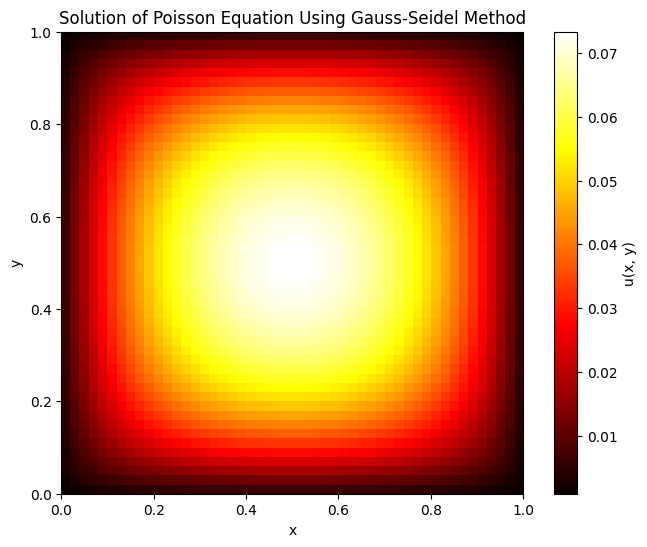

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Parameters
N = 50  # Number of grid points in each direction

# Create the grid
u = np.zeros((N+2, N+2))  # Solution grid, including boundary points
f = np.ones((N+2, N+2))   # Constant source term

# Set Dirichlet boundary conditions (zero on all boundaries)
u[:, 0] = u[:, -1] = u[0, :] = u[-1, :] = 0

@jit(nopython=True)
def Gauss_Seidel_method(u, f, N, max_iter=10000, tol=1e-6):
    h2 = (1.0 / (N + 1)) ** 2  # Precompute h^2
    for it in range(max_iter):
        max_diff = 0.0
        for i in range(1, N+1):
            for j in range(1, N+1):
                old_u = u[i, j]
                u[i, j] = (f[i, j] * h2 + u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1]) / 4.0
                max_diff = max(max_diff, abs(u[i, j] - old_u))  # Track max difference
        
        if max_diff < tol:  # Convergence check
            print(f"Converged after {it+1} iterations")
            break
    return u

# Run solver
u = Gauss_Seidel_method(u, f, N)

# Plot solution
plt.figure(figsize=(8, 6))
plt.imshow(u[1:N+1, 1:N+1], extent=[0, 1, 0, 1], origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='u(x, y)')
plt.title('Solution of Poisson Equation Using Gauss-Seidel Method')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
